# Import Packages

In [1]:
import os
import sys
sys.path.append("../")

import config
import h5py
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np

/mnt/c/users/quan/desktop/img_seg/data


/mnt/c/Users/QUAN/Desktop/img_seg/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Directories

In [2]:
DATA_PATH = os.path.join(config.DATA_DIR, "dataset.hdf5")
DATA_PATH

'/mnt/c/users/quan/desktop/img_seg/data/dataset.hdf5'

In [3]:
f = h5py.File(DATA_PATH, "r")
data_keys = f.keys()
for key in data_keys:
    print(f"Key name: {key}")
    print(f"Data type: {type(f[key])}")
    print(f"Data Length: {f[key].shape}")

Key name: annot_id
Data type: <class 'h5py._hl.dataset.Dataset'>
Data Length: (17412,)
Key name: frame_num
Data type: <class 'h5py._hl.dataset.Dataset'>
Data Length: (17412,)
Key name: image
Data type: <class 'h5py._hl.dataset.Dataset'>
Data Length: (17412, 802, 1054)
Key name: mask
Data type: <class 'h5py._hl.dataset.Dataset'>
Data Length: (17412, 802, 1054)


# Helper Functions

In [4]:
def plot_images(img_dataset, mask_dataset, data_size, no_iters = 1):
    plt.figure(figsize = (16, 8 * no_iters))
    plot_idx = 1
    for _ in range(no_iters):
        sample_idx = random.randint(0, data_size-1)
        plt.subplot(no_iters,2,plot_idx)
        image = img_dataset[sample_idx]
        plt.imshow(image, cmap = "gray")
        plt.title("Thyroid Image")
        plot_idx += 1
        plt.subplot(no_iters,2,plot_idx)
        mask = mask_dataset[sample_idx]
        plt.imshow(mask, cmap = "gray")
        plt.title("Mask")
        plot_idx += 1

# Dataset EDA

In [5]:
annot_id = f["annot_id"]
frame_num = f["frame_num"]
images = f["image"]
masks = f["mask"]

In [6]:
print(f"Image dataset shape {images.shape}")
print(f"Mask dataset shape {masks.shape}")
data_size = images.shape[0]

Image dataset shape (17412, 802, 1054)
Mask dataset shape (17412, 802, 1054)


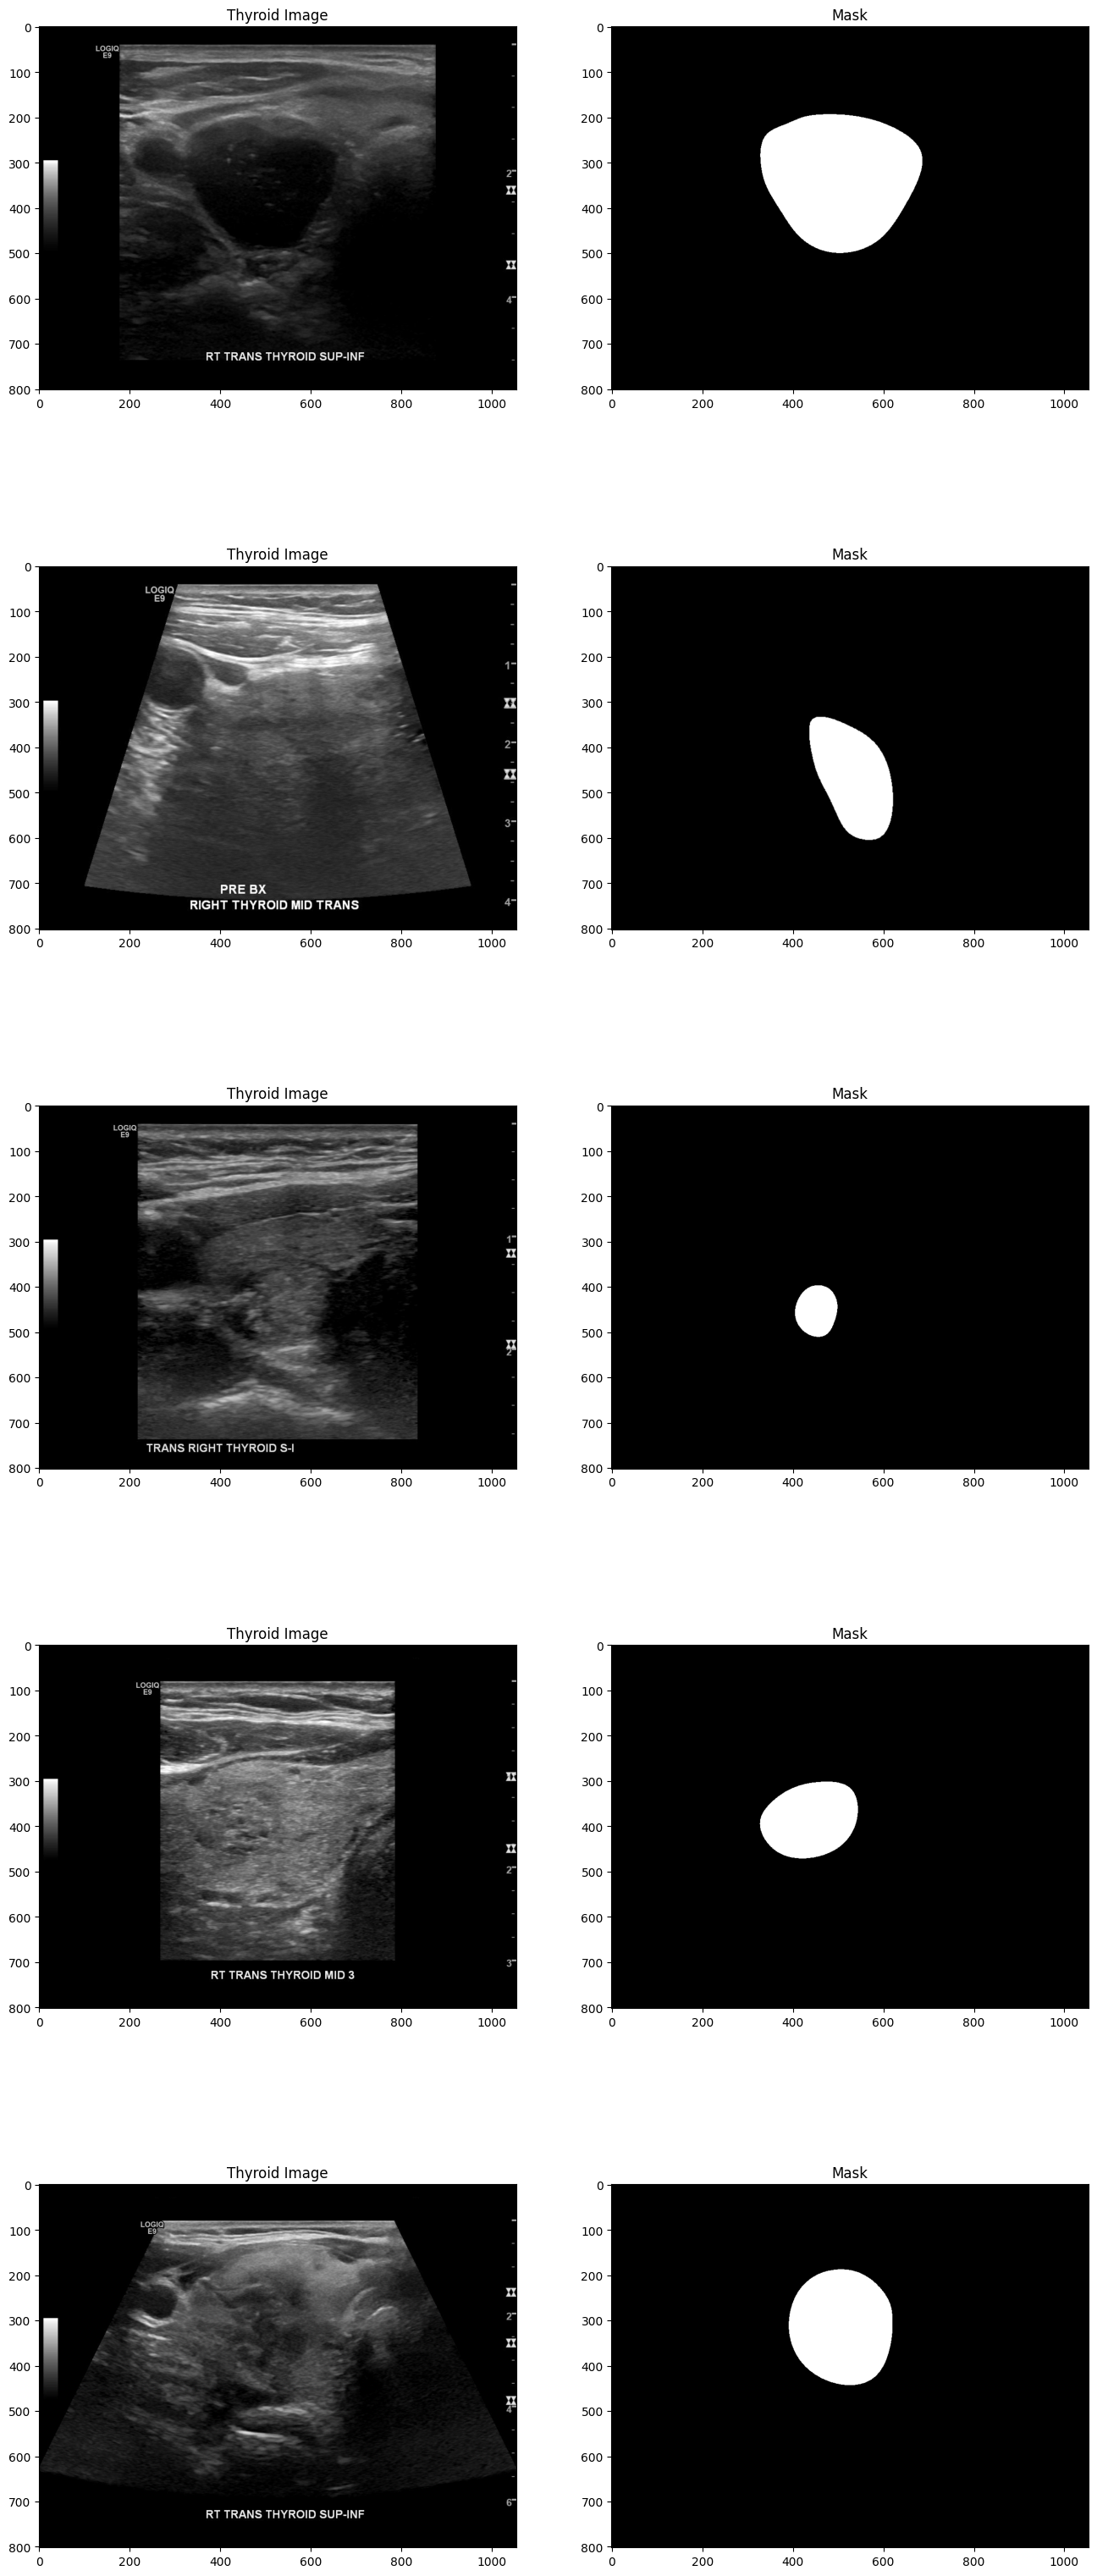

In [7]:
plot_images(img_dataset = images, mask_dataset = masks, data_size=data_size, no_iters=5)

In [8]:
sample_img = images[0]
sample_mask = masks[0]

print(f"Shape: {sample_img.shape}")
print(f"Max: {sample_img.max()}")
print(f"Min: {sample_img.min()}")

print(f"Shape: {sample_mask.shape}")
print(f"Max: {sample_mask.max()}")
print(f"Min: {sample_mask.min()}")
print(f"Mask unique values: {np.unique(sample_mask)}")

Shape: (802, 1054)
Max: 255
Min: 0
Shape: (802, 1054)
Max: 255
Min: 0
Mask unique values: [  0 255]
